# Converting Lat-long to Pincodes for major Indian cities

Data: https://github.com/datameet/PincodeBoundary

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

In [2]:
aa = gpd.read_file('export.geojson')

In [12]:
aa['geometry']

0    POINT (77.59129969999999 12.9791198)
Name: geometry, dtype: object

In [4]:
blore = gpd.read_file('blore.geojson')
chenn = gpd.read_file('chennai.geojson')
mumba = gpd.read_file('mumbai.geojson')
ahmed = gpd.read_file('ahmedabad.geojson')
hyder = gpd.read_file('hyderabad.geojson')
kolka = gpd.read_file('kolkatta.geojson')

### Plotting the pincode boundaries as polygons

Pincode plots for Mumbai and Bangalore

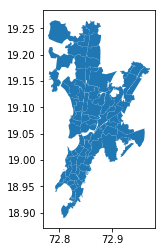

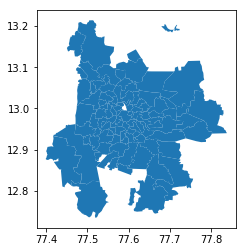

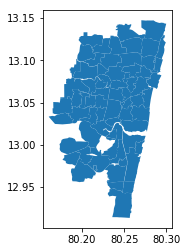

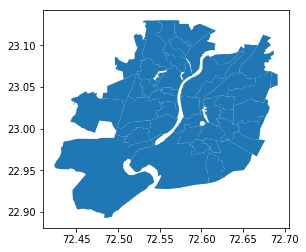

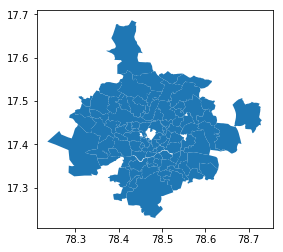

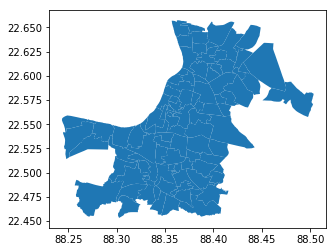

In [20]:
mumba.plot()
blore.plot()
chenn.plot()
ahmed.plot()
hyder.plot()
kolka.plot()

In [14]:
blore['centroid_column'] = blore.centroid
b = blore.set_geometry('centroid_column')

chenn['centroid_column'] = chenn.centroid
c = chenn.set_geometry('centroid_column')

mumba['centroid_column'] = mumba.centroid
m = mumba.set_geometry('centroid_column')

ahmed['centroid_column'] = ahmed.centroid
a = ahmed.set_geometry('centroid_column')

hyder['centroid_column'] = hyder.centroid
h = hyder.set_geometry('centroid_column')

kolka['centroid_column'] = kolka.centroid
k = kolka.set_geometry('centroid_column')

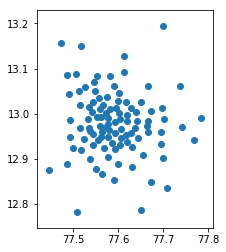

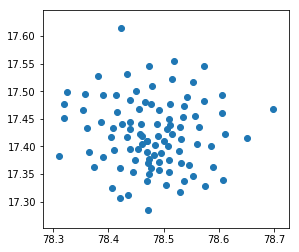

In [17]:
b.plot()
h.plot()

In [24]:
data = pd.concat([b,c,m,a,h,k], ignore_index=True,sort=False)

In [25]:
data.head()

,objectid,pin_code,area_name,st_area(shape),st_length(shape),created_user,created_date,last_edited_user,last_edited_date,name,geometry,centroid_column,pin,st_length_shape_,created_us,created_da,last_edite,last_edi_1,shape_leng
0,203,560066.0,WHITE FIELD SO,1.886168e+07,27522.436239,posts,1406713225000,posts,1406713225000,WHITE FIELD SO,"POLYGON ((77.74495913453232 12.99340662866598,...",POINT (77.74226762906443 12.96975481712085),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204,560022.0,YESHWANTHPUR PO,6.567117e+06,15060.504934,posts,1406713225000,posts,1406713225000,YESHWANTHPUR PO,"POLYGON ((77.54316236974368 13.03902249289977,...",POINT (77.5445615269368 13.02621203606711),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,205,560094.0,R M V IIND STAGE EXTN. SO,6.700619e+06,14067.668023,posts,1406713225000,posts,1406713225000,R M V IIND STAGE EXTN. SO,"POLYGON ((77.57425723529988 13.01474800072438,...",POINT (77.57482868310433 13.03738652347235),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,206,560051.0,H K P Road,1.233083e+06,4573.162155,posts,1406713225000,posts,1406713225000,H K P Road,"POLYGON ((77.60694327863399 12.99367196706699,...",POINT (77.60374891411062 12.98814168125403),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,207,560107.0,Achitnagar,5.532553e+06,12121.313886,posts,1406713225000,posts,1406713225000,Achitnagar,"POLYGON ((77.48719653612727 13.07044353673906,...",POINT (77.48680903157597 13.08512467407258),NaN,NaN,NaN,NaN,NaN,NaN,NaN


MAP OF WHITE FIELD SO


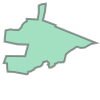

In [28]:
print("MAP OF",data['area_name'][0])
data['geometry'][0]

MAP OF YESHWANTHPUR PO


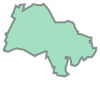

In [29]:
print("MAP OF",data['area_name'][1])
data['geometry'][1]

# How to check if point is inside a polygon?
https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html


Computationally, detecting if a point is inside a polygon is most commonly done using a specific formula called Ray Casting algorithm. Luckily, we do not need to create such a function ourselves for conducting the Point in Polygon (PIP) query. Instead, we can take advantage of Shapely’s binary predicates that can evaluate the topolocical relationships between geographical objects, such as the PIP as we’re interested here.



There are basically two ways of conducting PIP in Shapely:

- using a function called .within() that checks if a point is within a polygon
- using a function called .contains() that checks if a polygon contains a point


### Centroid of WHITE FIELD is within the polygon of WHITE FIELD

In [62]:
p1 = points.centroid[0]

In [88]:
p1.within(points['geometry'][0])

True

### Centroid of YESHWANTHPUR  is not within the polygon of WHITE FIELD

In [86]:
p1 = points.centroid[0]
p1.within(points['geometry'][1])

False

# Getting the Pincode given the location

In [42]:
def getpincode(lat , long):
    lat = float(lat)
    long = float(long)
    p = Point(long,lat)
    for i in range(0,len(data)):
        if p.within(data['geometry'][i]) is True:
            pin = int(data['pin_code'][i])
            area =data['area_name'][i]
        else:
            continue
    return pin,area

In [43]:
getpincode(19.040010,72.841420)

(400016, 'MAHIM HEAD POST OFFOCE')

In [46]:
data.shape

(504, 19)